In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split

## load dataset

In [71]:
data = pd.read_csv("./input/train_users_2.csv")
data = data.sort_values(by="timestamp_first_active")
print('Data Shape:', data.shape)
data.columns

Data Shape: (213451, 16)


Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

## dataset split (0.8/0.2)

In [72]:
train_data, test_data = train_test_split(data, test_size=0.2)

print('# of Train data:', len(train_data))
print('# of Ttest data:', len(test_data))

train_data.drop('date_first_booking',1)
test_data.drop('date_first_booking',1)
train_data=train_data.sort_values(by='timestamp_first_active')
test_data=test_data.sort_values(by='timestamp_first_active')

# of Train data: 170760
# of Ttest data: 42691


## clean data

In [73]:
train_data.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US
10,yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US
12,k6np330cm1,2010-01-05,20100105060859,2010-01-18,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,FR


In [74]:
test_data.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
11,om1ss59ys8,2010-01-05,20100105051812,NaN,FEMALE,47.0,basic,0,en,other,craigslist,untracked,Web,iPhone,-unknown-,NDF
14,ju3h98ch3w,2010-01-07,20100107055820,NaN,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,iPhone,Mobile Safari,NDF
15,v4d5rl22px,2010-01-07,20100107204555,2010-01-08,FEMALE,33.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,CA
16,2dwbwkx056,2010-01-07,20100107215125,NaN,-unknown-,NaN,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,NDF
17,frhre329au,2010-01-07,20100107224625,2010-01-09,-unknown-,31.0,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,US
19,gdka1q5ktd,2010-01-10,20100110010817,2010-01-10,FEMALE,29.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,FR
20,qdubonn3uk,2010-01-10,20100110152120,2010-01-18,-unknown-,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,US
22,80f7dwscrn,2010-01-11,20100111031438,2010-01-11,-unknown-,40.0,basic,0,en,seo,google,untracked,Web,iPhone,-unknown-,US


In [75]:
train_data.gender.replace('-unknown-',np.nan, inplace=True)
test_data.gender.replace('-unknown-',np.nan, inplace=True)
train_data.age.replace('NaN', np.nan, inplace=True)
test_data.age.replace('NaN',np.nan, inplace=True)

In [76]:
train_data.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,NaN,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,NaN,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US
10,yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US
12,k6np330cm1,2010-01-05,20100105060859,2010-01-18,NaN,NaN,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,FR


## EDA

NDF      58.398337
US       29.202389
other     4.704263
FR        2.350082
IT        1.319396
GB        1.074022
ES        1.058796
CA        0.667604
DE        0.513586
NL        0.346685
AU        0.258257
PT        0.106582
Name: country_destination, dtype: float64


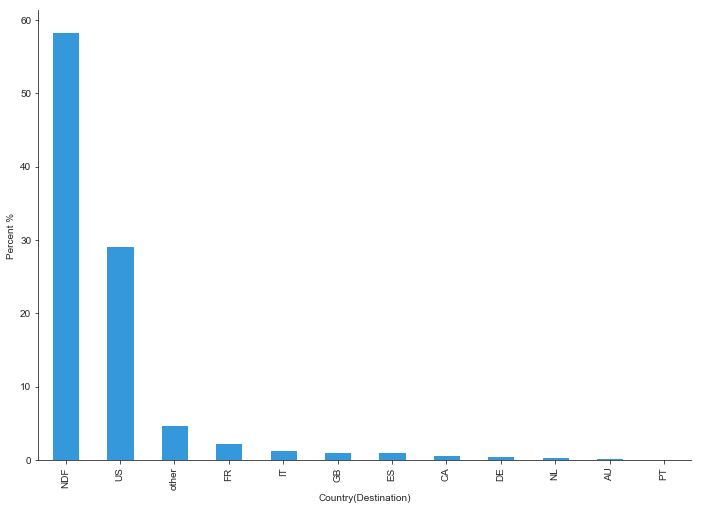

In [77]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = train_data.country_destination.value_counts() / train_data.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Country(Destination)')
plt.ylabel('Percent %')
sns.despine()

print(destination_percentage)

FEMALE    29.650972
MALE      25.532326
OTHER      0.132349
Name: gender, dtype: float64
Gender Missing (%) 44.68435230733192


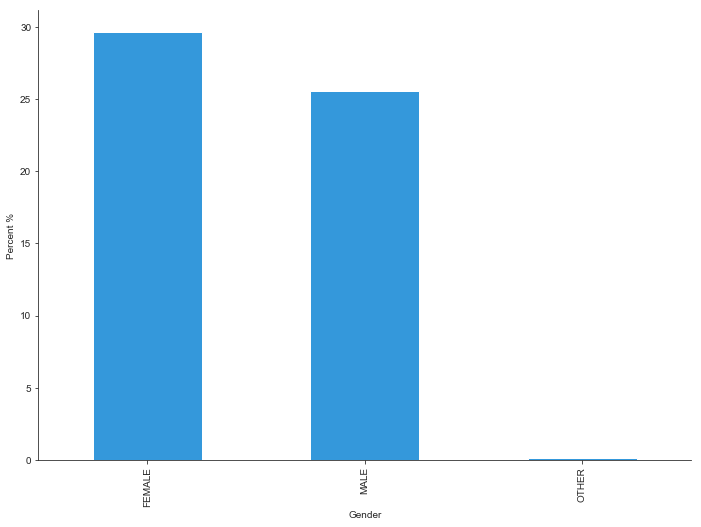

In [78]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
gender_percentage = train_data.gender.value_counts() / train_data.shape[0] * 100
gender_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Gender')
plt.ylabel('Percent %')
sns.despine()

print(gender_percentage)
print("Gender Missing (%)",100-sum(gender_percentage.values))

Mac Desktop           41.989927
Windows Desktop       34.055985
iPhone                 9.747013
iPad                   6.704732
Other/Unknown          4.980675
Android Phone          1.312368
Android Tablet         0.607285
Desktop (Other)        0.565706
SmartPhone (Other)     0.036308
Name: first_device_type, dtype: float64


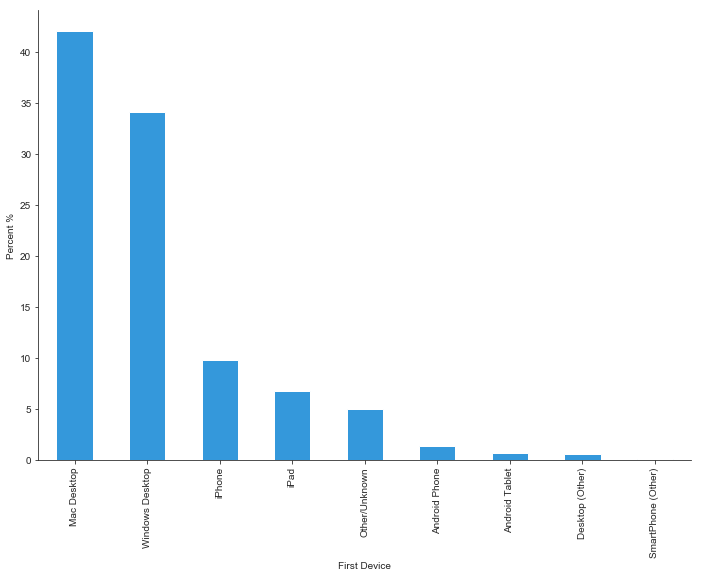

In [79]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
first_device_percentage = train_data.first_device_type.value_counts() / train_data.shape[0] * 100
first_device_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('First Device')
plt.ylabel('Percent %')
sns.despine()

print(first_device_percentage)

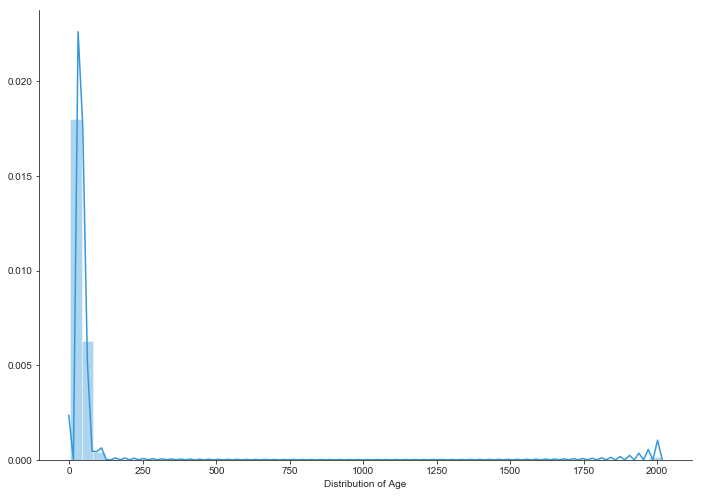

In [80]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(train_data.age.dropna(), color='#3498DB')
plt.xlabel('Distribution of Age')
sns.despine()



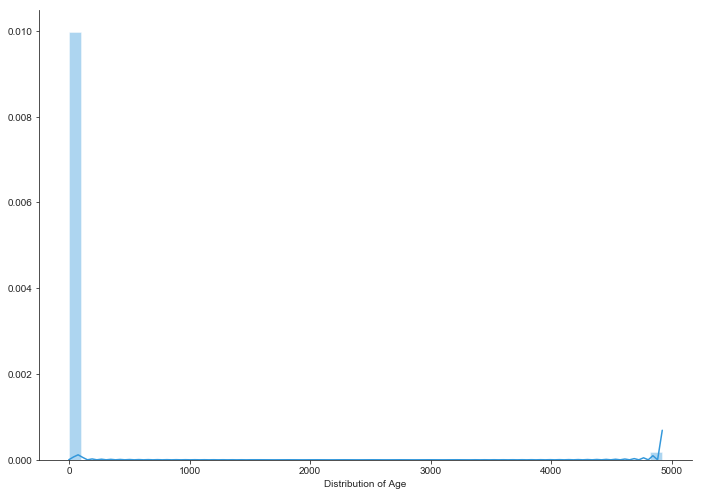

In [81]:
age_avg = max(train_data.age.dropna().value_counts())

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
train_data['age']=train_data['age'].apply(lambda x : age_avg if x>100 else x)
sns.distplot(train_data.age.dropna(), color='#3498DB')
plt.xlabel('Distribution of Age')
sns.despine()

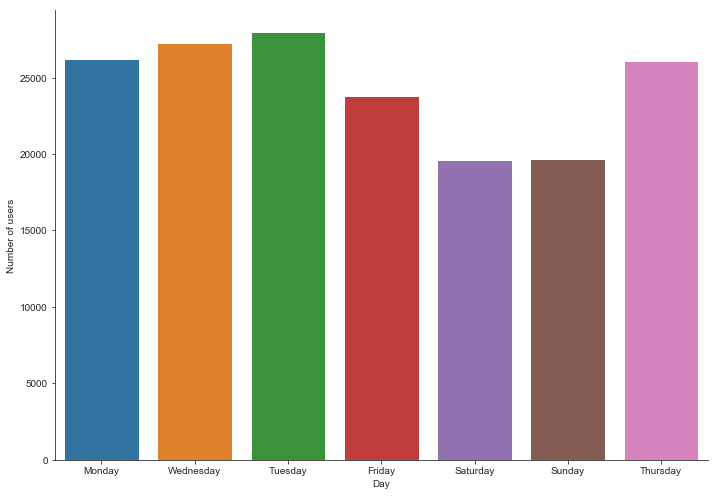

In [82]:
train_data['date_account_created_new'] = pd.to_datetime(train_data['date_account_created'])
train_data['date_first_active_new'] = pd.to_datetime((train_data.timestamp_first_active // 1000000), format='%Y%m%d')
train_data['date_account_created_day'] = train_data.date_account_created_new.dt.weekday_name
train_data['date_account_created_month'] = train_data.date_account_created_new.dt.month
train_data['date_account_created_year'] = train_data.date_account_created_new.dt.year
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

sns.countplot(x='date_account_created_day',data=train_data)
plt.xlabel('Day')
plt.ylabel('Number of users')
sns.despine()

en    96.628016
zh     0.768915
fr     0.556922
es     0.433942
ko     0.358983
de     0.339658
it     0.244202
ru     0.185641
pt     0.111853
ja     0.105411
sv     0.059733
nl     0.043921
tr     0.031038
da     0.026353
pl     0.024010
no     0.014640
th     0.012298
cs     0.012298
el     0.011712
id     0.010541
hu     0.008199
fi     0.005856
is     0.002928
ca     0.002342
hr     0.000586
Name: language, dtype: float64


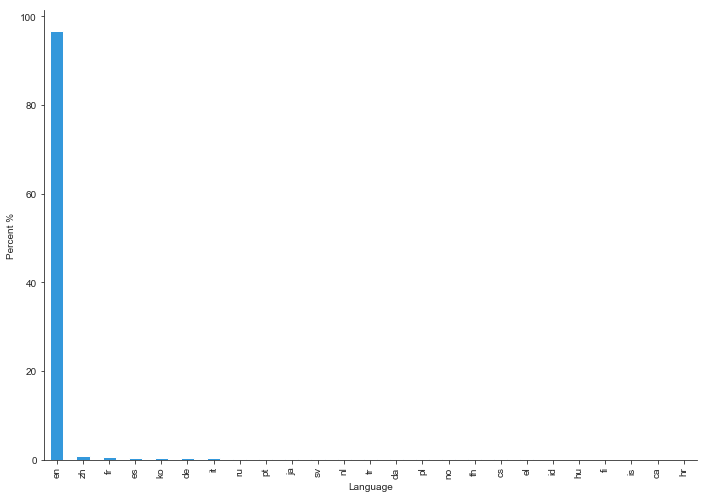

In [83]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
language_percentage = train_data.language.value_counts() / train_data.shape[0] * 100
language_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Language')
plt.ylabel('Percent %')
sns.despine()

print(language_percentage)

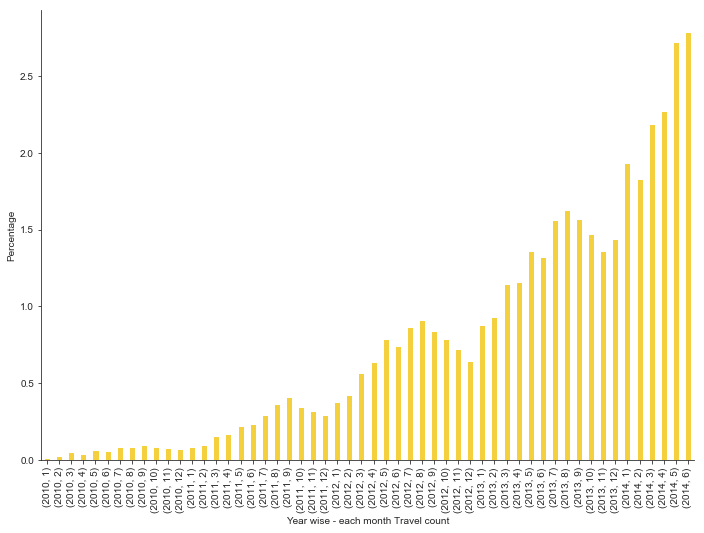

In [84]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

train_data['booked'] = train_data.country_destination.apply(lambda x:1 if x!='NDF' else 0 )
destination_percentage = train_data.groupby(['date_account_created_year','date_account_created_month']).booked.sum() / train_data.shape[0] * 100
destination_percentage.plot(kind='bar',color="#F4D03F")
plt.xlabel('Year wise - each month Travel count')
plt.ylabel('Percentage')
sns.despine()

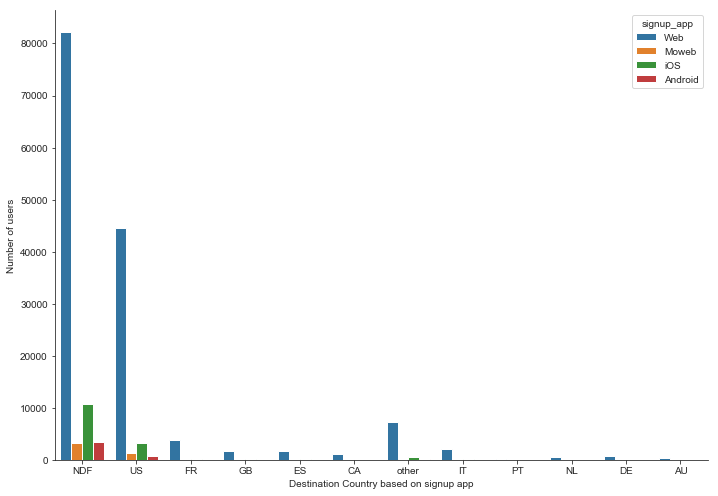

In [85]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = train_data[train_data['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_app',data=train_data)
plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')
sns.despine()

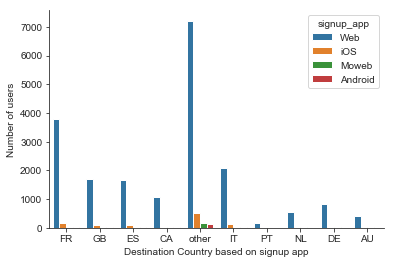

In [86]:
sns.countplot(x='country_destination', hue='signup_app',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')
sns.despine()

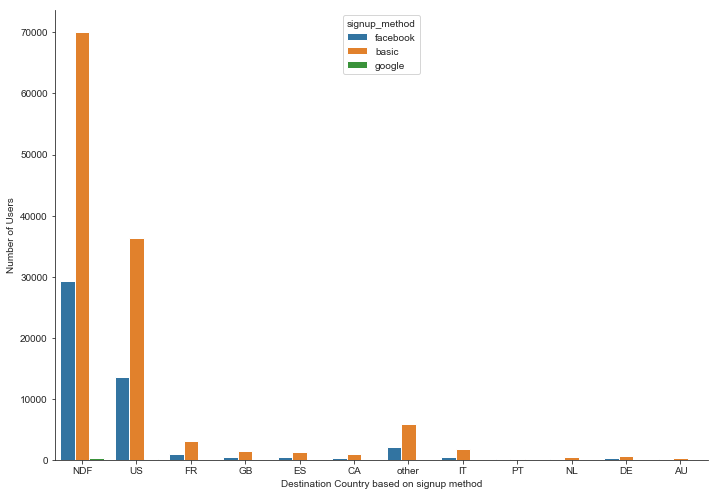

In [87]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(x='country_destination', hue='signup_method',data=train_data)
plt.xlabel('Destination Country based on signup method')
plt.ylabel('Number of Users')
sns.despine()

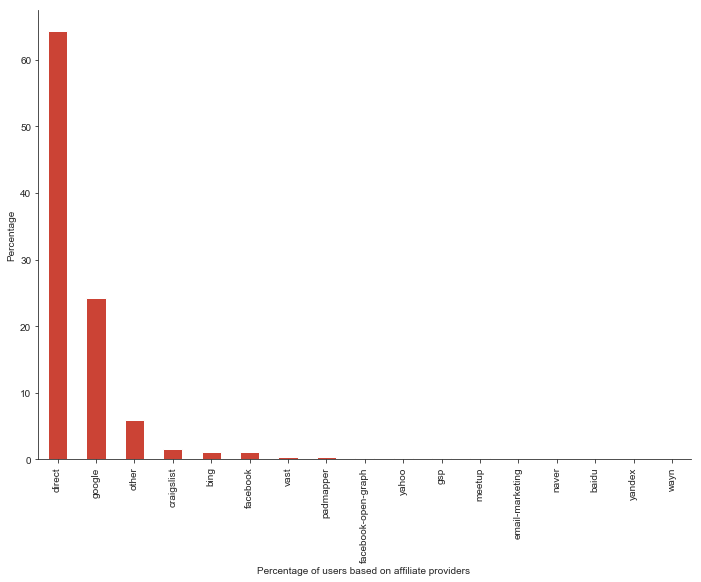

In [88]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
affiliate_provider_percentage = train_data.affiliate_provider.value_counts() / train_data.shape[0] * 100
affiliate_provider_percentage.plot(kind='bar',color='#CB4335')
plt.xlabel('Percentage of users based on affiliate providers ')
plt.ylabel('Percentage')
sns.despine()

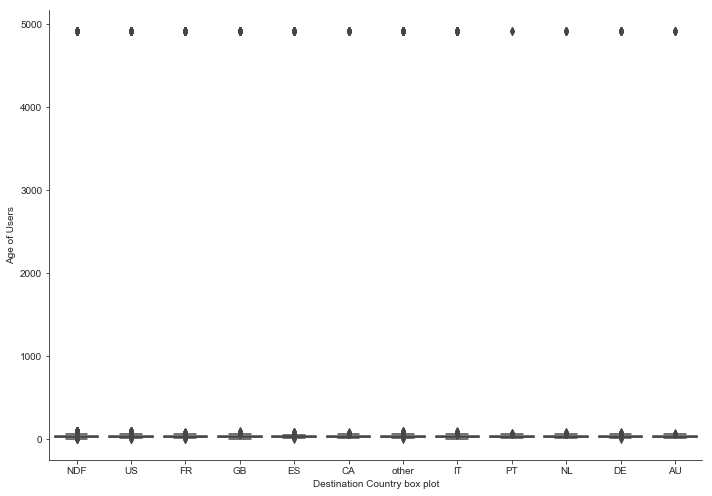

In [89]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(y='age' , x='country_destination',data=train_data)
plt.xlabel('Destination Country box plot')
plt.ylabel('Age of Users')
sns.despine()

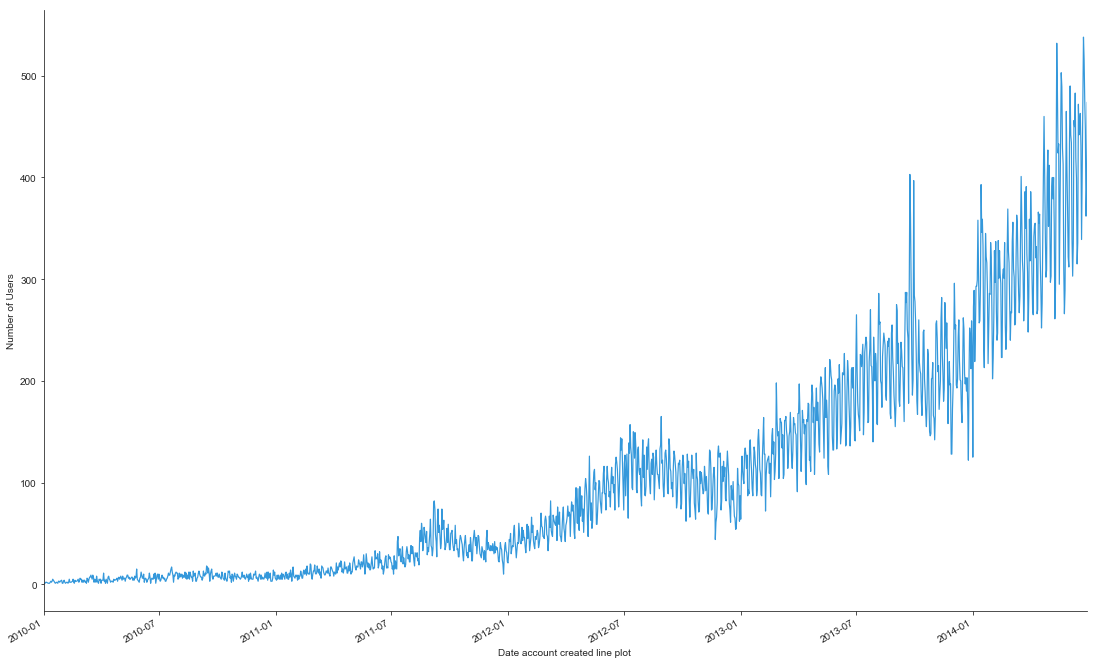

In [90]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 12.27)
train_data.date_account_created_new.value_counts().plot(kind='line', linewidth=1.2, color='#3498DB')
plt.xlabel('Date account created line plot ')
plt.ylabel('Number of Users')
sns.despine()